# Titanic dataset classification

In [687]:
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator

## Load the Data

In [688]:
train_data = pd.read_csv('data/titanic/train.csv')
test_data = pd.read_csv('data/titanic/test.csv')

## Data Analyze

In [689]:
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [690]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [691]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


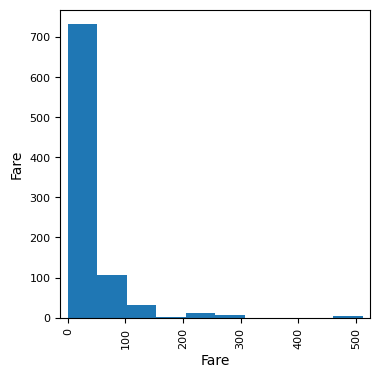

In [692]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_data[['Fare']], figsize=(4, 4))
plt.show()


## Data preprocessing

As we can see in the 'Data analyze' step there are a few steps we can do, which will help us to filter our data for better features extraction.
1. Drop the 'PassengerId' column, because it doesn't have useful information in case of passenger survive or not.
2. Probably we should process the 'Name' column and divide it into subgroups like - Mr., Mrs, Miss and so on.
3. Convert the 'Sex' column to binary format.
4. Handle a missing values for 'Age' column.
5. Probably drop the 'Ticket' column, because it has the same information type as 'passenger_id'.
6. Scale the 'Fare' column.
7. Handle missing values for the 'Cabin' column, probably convert it to binary feature i.e. has_cabin or not.
8. Encode the 'Embarked' column.

After that we can compute the standard correlation coefficients to see do we have any steps for improvements.

In [693]:
# For this moment we will experiment with data for this purpose let create a copy of the train data
# After that I will create a pipeline for this
train_data_cp = train_data.copy()

#### Drop the 'passenger_id' and 'Ticket' columns 

In [694]:
train_data_cp.drop(['PassengerId'], axis=1, inplace=True)
train_data_cp.drop(['Ticket'], axis=1, inplace=True)

#### Process the 'Name' column 

In previous step we explore the data and saw that the 'Name' column has the next structure '... , Title. ...'

Let's leave only this title instead of full name

In [695]:
some_name = train_data_cp['Name'][0]
some_name

'Braund, Mr. Owen Harris'

In [696]:
def extract_title(name):
    match = re.search(r",\s*(\w+)\.", name)
    if match:
        return match.group(1)
    else:
        return 'Others'


extract_title(some_name)

'Mr'

In [697]:
train_data_cp['Title'] = train_data_cp['Name'].apply(extract_title)
# now we can drop the 'Name' column
train_data_cp.drop(['Name'], axis=1, inplace=True)

In [698]:
train_data_cp['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Others        1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

#### Convert the 'Sex' to binary format

In [699]:
train_data_cp['Sex_binary'] = (train_data_cp['Sex'] == 'female').astype(int)
# Now we can drop the 'Sex' column
train_data_cp.drop(['Sex'], axis=1, inplace=True)

In [700]:
train_data_cp.head(20)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Sex_binary
0,0,3,22.0,1,0,7.2500,NaN,S,Mr,0
1,1,1,38.0,1,0,71.2833,C85,C,Mrs,1
2,1,3,26.0,0,0,7.9250,NaN,S,Miss,1
3,1,1,35.0,1,0,53.1000,C123,S,Mrs,1
4,0,3,35.0,0,0,8.0500,NaN,S,Mr,0
5,0,3,NaN,0,0,8.4583,NaN,Q,Mr,0
6,0,1,54.0,0,0,51.8625,E46,S,Mr,0
7,0,3,2.0,3,1,21.0750,NaN,S,Master,0
8,1,3,27.0,0,2,11.1333,NaN,S,Mrs,1
9,1,2,14.0,1,0,30.0708,NaN,C,Mrs,1


#### Handle missing values for the 'Age' column

In [701]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train_data_cp['Age'] = imputer.fit_transform(train_data_cp[['Age']])

In [702]:
train_data_cp.head(20)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Sex_binary
0,0,3,22.000000,1,0,7.2500,NaN,S,Mr,0
1,1,1,38.000000,1,0,71.2833,C85,C,Mrs,1
2,1,3,26.000000,0,0,7.9250,NaN,S,Miss,1
3,1,1,35.000000,1,0,53.1000,C123,S,Mrs,1
4,0,3,35.000000,0,0,8.0500,NaN,S,Mr,0
5,0,3,29.699113,0,0,8.4583,NaN,Q,Mr,0
6,0,1,54.000000,0,0,51.8625,E46,S,Mr,0
7,0,3,2.000000,3,1,21.0750,NaN,S,Master,0
8,1,3,27.000000,0,2,11.1333,NaN,S,Mrs,1
9,1,2,14.000000,1,0,30.0708,NaN,C,Mrs,1


#### Scale the 'Fare' column

In [703]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
train_data_cp['Fare'] = scaler.fit_transform(train_data_cp[['Fare']])
train_data_cp.head(20)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Sex_binary
0,0,3,22.000000,1,0,0.014151,NaN,S,Mr,0
1,1,1,38.000000,1,0,0.139136,C85,C,Mrs,1
2,1,3,26.000000,0,0,0.015469,NaN,S,Miss,1
3,1,1,35.000000,1,0,0.103644,C123,S,Mrs,1
4,0,3,35.000000,0,0,0.015713,NaN,S,Mr,0
5,0,3,29.699113,0,0,0.016510,NaN,Q,Mr,0
6,0,1,54.000000,0,0,0.101229,E46,S,Mr,0
7,0,3,2.000000,3,1,0.041136,NaN,S,Master,0
8,1,3,27.000000,0,2,0.021731,NaN,S,Mrs,1
9,1,2,14.000000,1,0,0.058694,NaN,C,Mrs,1


array([[<Axes: xlabel='Fare', ylabel='Fare'>]], dtype=object)

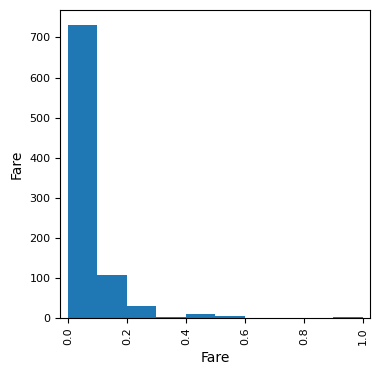

In [704]:
scatter_matrix(train_data_cp[['Fare']], figsize=(4, 4))

#### Handle missing values for the 'Cabin' column

In [705]:
train_data_cp['Has_cabin'] = (~train_data_cp[['Cabin']].isna()).astype(int)
# Now we can drop the 'Cabin' column
train_data_cp.drop(['Cabin'], axis=1, inplace=True)

In [706]:
train_data_cp.head(20)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Sex_binary,Has_cabin
0,0,3,22.000000,1,0,0.014151,S,Mr,0,0
1,1,1,38.000000,1,0,0.139136,C,Mrs,1,1
2,1,3,26.000000,0,0,0.015469,S,Miss,1,0
3,1,1,35.000000,1,0,0.103644,S,Mrs,1,1
4,0,3,35.000000,0,0,0.015713,S,Mr,0,0
5,0,3,29.699113,0,0,0.016510,Q,Mr,0,0
6,0,1,54.000000,0,0,0.101229,S,Mr,0,1
7,0,3,2.000000,3,1,0.041136,S,Master,0,0
8,1,3,27.000000,0,2,0.021731,S,Mrs,1,0
9,1,2,14.000000,1,0,0.058694,C,Mrs,1,0


#### Encode the 'Embarked' column.

In [707]:
train_data_cp['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Firstly, we can see that there is only 3 categories specified and the feature also has missing values that we need to handle

In [708]:
# Let's handle the missing values first
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
train_data_cp[['Embarked']] = imputer.fit_transform(train_data_cp[['Embarked']])

In [709]:
train_data_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked    891 non-null    object 
 7   Title       891 non-null    object 
 8   Sex_binary  891 non-null    int64  
 9   Has_cabin   891 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


In [710]:
# Since we have 2 categorical features we can encode them using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

cat_features = train_data_cp.select_dtypes(include='object')
print(cat_features.columns)
cat_encoder = OneHotEncoder(sparse_output=False)
cat_columns_1hot = cat_encoder.fit_transform(cat_features)
cat_columns_1hot

Index(['Embarked', 'Title'], dtype='object')


array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [711]:
cat_encoder.get_feature_names_out()

array(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Capt',
       'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer',
       'Title_Lady', 'Title_Major', 'Title_Master', 'Title_Miss',
       'Title_Mlle', 'Title_Mme', 'Title_Mr', 'Title_Mrs', 'Title_Ms',
       'Title_Others', 'Title_Rev', 'Title_Sir'], dtype=object)

In [712]:
cat_encoded_output = pd.DataFrame(cat_columns_1hot, columns=cat_encoder.get_feature_names_out())
cat_encoded_output.head(5)

,Embarked_C,Embarked_Q,Embarked_S,Title_Capt,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Others,Title_Rev,Title_Sir
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [713]:
# Now we can drop the 'Embarked' and 'Title' columns and insert our encoded dataframe into the main dataframe
train_data_cp.drop(['Embarked'], axis=1, inplace=True)
train_data_cp.drop(['Title'], axis=1, inplace=True)
train_data_cp = pd.concat([train_data_cp, cat_encoded_output], axis=1)
train_data_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Pclass          891 non-null    int64  
 2   Age             891 non-null    float64
 3   SibSp           891 non-null    int64  
 4   Parch           891 non-null    int64  
 5   Fare            891 non-null    float64
 6   Sex_binary      891 non-null    int64  
 7   Has_cabin       891 non-null    int64  
 8   Embarked_C      891 non-null    float64
 9   Embarked_Q      891 non-null    float64
 10  Embarked_S      891 non-null    float64
 11  Title_Capt      891 non-null    float64
 12  Title_Col       891 non-null    float64
 13  Title_Don       891 non-null    float64
 14  Title_Dr        891 non-null    float64
 15  Title_Jonkheer  891 non-null    float64
 16  Title_Lady      891 non-null    float64
 17  Title_Major     891 non-null    flo

### Create Data processing pipeline

In [714]:
# Let's create a custom transformer to extract title from names and create Has_cabin feature
from sklearn.base import BaseEstimator, TransformerMixin


class TitleExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X['Name'].apply(self.extract_title).to_frame(name="Title")

    def get_feature_names_out(self, names=None):
        return ['Title']

    @staticmethod
    def extract_title(name):
        match = re.search(r",\s*(\w+)\.", name)
        if match:
            # We need to specify titles which occurs the most
            if match.group(1) == 'Mrs' or match.group(1) == 'Mr' \
                    or match.group(1) == 'Miss' or match.group(1) == 'Master':
                return match.group(1)
        return 'Others'


class CabinTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        has_cabin = (~X['Cabin'].isna()).astype(int)
        return has_cabin.to_frame(name='Has_cabin')

    def get_feature_names_out(self, names=None):
        return ['Has_cabin']


In [715]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', MinMaxScaler())
])

cat_pipeline = Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder()),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('onehot_encoder', OneHotEncoder(sparse_output=False)),
])

title_pipeline = Pipeline(steps=[
    ('extractor', TitleExtractor()),
    ('encoder', OneHotEncoder(sparse_output=False))
])

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocessing = ColumnTransformer(transformers=[
    ('drop_cols', 'drop', ['PassengerId', 'Ticket']),
    ('title', title_pipeline, ['Name']),
    ('cabin', CabinTransformer(), ['Cabin']),
    ('num_attr', num_pipeline, num_attribs),
    ('cat_attr', cat_pipeline, cat_attribs)
], remainder='passthrough')

In [716]:
X_train = preprocessing.fit_transform(train_data)
X_train.shape

(891, 19)

In [717]:
X_train

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [718]:
preproc_data = pd.DataFrame(X_train, columns=preprocessing.get_feature_names_out())

In [719]:
# Let's see what data we got after preprocess step
preproc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title__Title_Master     891 non-null    float64
 1   title__Title_Miss       891 non-null    float64
 2   title__Title_Mr         891 non-null    float64
 3   title__Title_Mrs        891 non-null    float64
 4   title__Title_Others     891 non-null    float64
 5   cabin__Has_cabin        891 non-null    float64
 6   num_attr__Age           891 non-null    float64
 7   num_attr__SibSp         891 non-null    float64
 8   num_attr__Parch         891 non-null    float64
 9   num_attr__Fare          891 non-null    float64
 10  cat_attr__Pclass_0.0    891 non-null    float64
 11  cat_attr__Pclass_1.0    891 non-null    float64
 12  cat_attr__Pclass_2.0    891 non-null    float64
 13  cat_attr__Sex_0.0       891 non-null    float64
 14  cat_attr__Sex_1.0       891 non-null    fl

In [720]:
X_train = train_data.drop(['Survived'], axis=1)
y_train = train_data['Survived']
y_train.shape

(891,)

## Select and Train a Model

In [731]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

knn_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', KNeighborsClassifier())
])

rf_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', RandomForestClassifier())
])

param_grid = [
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [1, 2, 3, 4, 5, 7, 10],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
    },
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': randint(10, 100),
        'classifier__criterion': ['gini', 'entropy', 'log_loss'],
    }
]

grid_search = RandomizedSearchCV(rf_pipeline, param_grid, cv=3)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'classifier': RandomForestClassifier(random_state=42),
 'classifier__criterion': 'log_loss',
 'classifier__n_estimators': 66}

In [732]:
grid_search.best_score_

np.float64(0.8069584736251403)

In [728]:
final_model = grid_search.best_estimator_

In [733]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(final_model, X_train, y_train, cv=10)
forest_scores.mean()

np.float64(0.8193383270911362)

In [734]:
y_pred = final_model.predict(test_data)

pred_frame = pd.DataFrame({
    'PassengerId': test_data['PassengerId'], 
    'Survived': y_pred
})
pred_frame.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [735]:
pred_frame.to_csv('data/titanic/predictions.csv', index=False)
